<a href="https://colab.research.google.com/github/fowardelcac/Mercado-inmobilirario-cba/blob/main/Dataset/Remax/Procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/Mercado-inmobilirario-cba.git

fatal: destination path 'Mercado-inmobilirario-cba' already exists and is not an empty directory.


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('/content/Mercado-inmobilirario-cba/Dataset/Remax/Remax_df.csv').drop('Unnamed: 0', axis=1)
df[['Tipo de propiedad', 'Acción', 'Dirección']] = df['Descripciones'].str.split(' en ', expand=True)

# Convertir a lower case y manejar NaN en 'Dirección'
df['Dirección'] = df['Dirección'].apply(lambda x: x.lower() if pd.notnull(x) else x)

# Dividir 'Dirección' en 'Ubicacion' y 'Barrio'
df['Ubicacion'] = df['Dirección'].str.split(',').str[0].apply(lambda x: x.lower() if pd.notnull(x) else x)
df['Barrio'] = df['Dirección'].str.split(',').str[1].apply(lambda x: x.lower() if pd.notnull(x) else x)
df['Tipo de propiedad'] = df['Tipo de propiedad'].apply(lambda x: x.lower() if pd.notnull(x) else x)

df.drop(['Descripciones', 'Dirección'], axis=1, inplace=True)
df.head()

,M2,M2 Cubiertos,Ambientes,Baños,Tipo de propiedad,Acción,Ubicacion,Barrio
0,131.0,93.0,4,2,casa duplex,venta,pachamama 7600,cordoba
1,41.0,23.0,2,1,departamento,venta,francisco n de laprida 400,guemes
2,445.0,445.0,7,4,casa,venta,josé roque funes 1900,cerro de las rosas
3,102.0,102.0,7,2,casa,venta,temístocles castellano 1500,bajo palermo
4,210.0,210.0,11,3,casa,venta,cleto peña 1900,maipu seccion 2


In [8]:
patron = re.compile(r'(?:manzana|mza|mz)', flags=re.IGNORECASE)
ubicaciones_filtradas = df[df['Ubicacion'].str.contains(patron)]

In [12]:
indices_a_eliminar = ubicaciones_filtradas.index
df.drop(index=indices_a_eliminar, inplace=True)
df

,M2,M2 Cubiertos,Ambientes,Baños,Tipo de propiedad,Acción,Ubicacion,Barrio
0,131.0,93.0,4,2,casa duplex,venta,pachamama 7600,cordoba
1,41.0,23.0,2,1,departamento,venta,francisco n de laprida 400,guemes
2,445.0,445.0,7,4,casa,venta,josé roque funes 1900,cerro de las rosas
3,102.0,102.0,7,2,casa,venta,temístocles castellano 1500,bajo palermo
4,210.0,210.0,11,3,casa,venta,cleto peña 1900,maipu seccion 2
...,...,...,...,...,...,...,...,...
1936,425.0,387.0,8,4,casa,venta,josé manuel chaves 200,san salvador
1938,111.0,111.0,6,2,casa,venta,rodríguez peña 1800,alta cordoba
1939,60.0,60.0,4,2,departamento,venta,bartolomé argensola 800,alta cordoba
1940,60.0,60.0,3,1,departamento,venta,santa rosa 1300,alberdi


In [13]:
indices_a_eliminar = [1597, 1070, 318, 350, 421, 16]
ubicaciones_filtradas = ubicaciones_filtradas.drop(index=indices_a_eliminar)
ubicaciones_filtradas.Ubicacion = ubicaciones_filtradas.Barrio
ubicaciones_filtradas

,M2,M2 Cubiertos,Ambientes,Baños,Tipo de propiedad,Acción,Ubicacion,Barrio
78,280.00,130.0,6,1,casa duplex,venta,docta - urbanización inteligente,docta - urbanización inteligente
101,196.00,196.0,5,2,casa,venta,docta - urbanización inteligente,docta - urbanización inteligente
214,170.00,170.0,5,1,casa duplex,venta,chacras del sur,chacras del sur
256,181.50,168.0,6,3,casa duplex,venta,altos de manantiales,altos de manantiales
422,195.00,195.0,6,3,casa,venta,miradores de manantiales,miradores de manantiales
438,184.25,87.0,3,2,casa duplex,venta,san ignacio village,san ignacio village
460,174.00,174.0,5,2,casa,venta,miradores de manantiales,miradores de manantiales
646,110.00,110.0,3,2,casa duplex,venta,manantiales,manantiales
863,96.00,90.0,7,1,departamento,venta,los gigantes,los gigantes
890,300.00,300.0,8,2,casa,venta,greenville,greenville


In [16]:
len(df), len(ubicaciones_filtradas)

(1904, 32)

In [20]:
data = pd.concat([ubicaciones_filtradas, df],  ignore_index=True)
data.drop(['Acción', 'Barrio'], axis=1, inplace=True)

In [21]:
data

,M2,M2 Cubiertos,Ambientes,Baños,Tipo de propiedad,Ubicacion
0,280.0,130.0,6,1,casa duplex,docta - urbanización inteligente
1,196.0,196.0,5,2,casa,docta - urbanización inteligente
2,170.0,170.0,5,1,casa duplex,chacras del sur
3,181.5,168.0,6,3,casa duplex,altos de manantiales
4,195.0,195.0,6,3,casa,miradores de manantiales
...,...,...,...,...,...,...
1931,425.0,387.0,8,4,casa,josé manuel chaves 200
1932,111.0,111.0,6,2,casa,rodríguez peña 1800
1933,60.0,60.0,4,2,departamento,bartolomé argensola 800
1934,60.0,60.0,3,1,departamento,santa rosa 1300


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   M2                 1936 non-null   float64
 1   M2 Cubiertos       1936 non-null   float64
 2   Ambientes          1936 non-null   int64  
 3   Baños              1936 non-null   int64  
 4   Tipo de propiedad  1936 non-null   object 
 5   Ubicacion          1936 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 90.9+ KB


# Tipo de propiedad

In [22]:
data['Tipo de propiedad'].value_counts()

 casa                         912
 departamento                 742
 casa duplex                  179
 departamento duplex           32
 departamento semipiso         31
 departamento monoambiente     18
 departamento piso             15
 casa triplex                   3
 departamento penthouse         3
 departamento loft              1
Name: Tipo de propiedad, dtype: int64

In [27]:
encoder = OneHotEncoder()

# Ajustar y transformar los datos
one_hot_encoded = encoder.fit_transform(data[['Tipo de propiedad']])

# Crear un nuevo DataFrame con las columnas codificadas
df_encoded_tipologia = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.categories_[0])
data.drop(['Tipo de propiedad'], axis=1, inplace=True)

# Ubicacion

In [34]:
def get_location(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return get_location(address)

geolocator = Nominatim(user_agent="my_app")
data['Latitud'], data['Longitud'] = zip(*data['Ubicacion'].apply(get_location))

In [94]:
exlcuidos = data.loc[data.Latitud.isnull()]
exlcuidos.Ubicacion.value_counts().to_frame()

,Ubicacion
colectora autopista rn 20 0,4
bv general ocampo 200,4
bv general ocampo 300,3
bv poniente umberto arturo illia 400,2
valle cercano 100,2
...,...
juan a. sarachaga 1200,1
av. padre luchesse 3500,1
country la rufina - avenida los alamos 1100,1
hector b. oddone 6500,1


In [75]:
def eliminar(df_nuevo, df_original):
  indices_a_elim = df_nuevo.index
  df_original.drop(index=indices_a_elim, inplace=True)

  return df_nuevo, df_original

## filtre manantiales

In [82]:
patron = re.compile(r'(?:Manantiales)', flags=re.IGNORECASE)
ubicaciones_filtradas = exlcuidos[exlcuidos['Ubicacion'].str.contains(patron)]
ubicaciones_filtradas['Ubicacion'] = 'altos de manantiales'

filt, df = eliminar(ubicaciones_filtradas, data)

filt['Latitud'], filt['Longitud'] = zip(*filt['Ubicacion'].apply(get_location))

<ipython-input-82-51709e0a39b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubicaciones_filtradas['Ubicacion'] = 'altos de manantiales'


KeyError: ignored

In [88]:
data = pd.concat([filt, df],  ignore_index=True)
data

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
0,132.0,132.0,3,2,altos de manantiales,-31.458160,-64.235907
1,73.0,60.0,2,1,altos de manantiales,-31.458160,-64.235907
2,181.0,136.0,3,2,altos de manantiales,-31.458160,-64.235907
3,181.0,136.0,4,2,altos de manantiales,-31.458160,-64.235907
4,165.0,165.0,6,3,altos de manantiales,-31.458160,-64.235907
...,...,...,...,...,...,...,...
1931,425.0,387.0,8,4,josé manuel chaves 200,-31.397935,-64.230324
1932,111.0,111.0,6,2,rodríguez peña 1800,-34.589988,-58.388097
1933,60.0,60.0,4,2,bartolomé argensola 800,-31.381698,-64.193066
1934,60.0,60.0,3,1,santa rosa 1300,-34.526678,-58.478846


·filtrar docta

In [89]:
patron = re.compile(r'(?:docta )', flags=re.IGNORECASE)
ubicaciones_filtradas = exlcuidos[exlcuidos['Ubicacion'].str.contains(patron)]
ubicaciones_filtradas['Ubicacion'] = 'docta'

filt, df = eliminar(ubicaciones_filtradas, data)

filt['Latitud'], filt['Longitud'] = zip(*filt['Ubicacion'].apply(get_location))
data = pd.concat([filt, df],  ignore_index=True)
data

<ipython-input-89-1b4b87b697a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ubicaciones_filtradas['Ubicacion'] = 'docta'
<ipython-input-89-1b4b87b697a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['Latitud'], filt['Longitud'] = zip(*filt['Ubicacion'].apply(get_location))


,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
0,280.0,130.0,6,1,docta,-31.460041,-64.306023
1,196.0,196.0,5,2,docta,-31.460041,-64.306023
2,130.0,130.0,3,1,docta,-31.460041,-64.306023
3,164.0,120.0,4,1,docta,-31.460041,-64.306023
4,132.0,132.0,5,3,docta,-31.460041,-64.306023
...,...,...,...,...,...,...,...
1931,425.0,387.0,8,4,josé manuel chaves 200,-31.397935,-64.230324
1932,111.0,111.0,6,2,rodríguez peña 1800,-34.589988,-58.388097
1933,60.0,60.0,4,2,bartolomé argensola 800,-31.381698,-64.193066
1934,60.0,60.0,3,1,santa rosa 1300,-34.526678,-58.478846


In [97]:
excluidos = data.loc[data.Latitud.isnull()]
excluidos

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
32,70.0,70.0,4,1,teniente benj.matienzo,NaN,NaN
37,200.0,165.0,10,2,v.escondido-los aromas,NaN,NaN
50,102.0,102.0,7,2,temístocles castellano 1500,NaN,NaN
54,275.0,145.0,4,1,diego de rojas caravantes 4300,NaN,NaN
55,327.0,327.0,7,2,carlos luis alfonso laveran 5500,NaN,NaN
...,...,...,...,...,...,...,...
1838,95.0,95.0,8,1,avenida dr ramon j carcano 200,NaN,NaN
1850,134.0,81.0,4,2,torres milenica 3400,NaN,NaN
1866,278.0,192.0,5,2,pasaje quinchan 1000,NaN,NaN
1925,280.0,240.0,7,4,federico gowland hopkins 5900,NaN,NaN


In [98]:
filt, data = eliminar(excluidos, data)


In [103]:
data

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
0,280.0,130.0,6,1,docta,-31.460041,-64.306023
1,196.0,196.0,5,2,docta,-31.460041,-64.306023
2,130.0,130.0,3,1,docta,-31.460041,-64.306023
3,164.0,120.0,4,1,docta,-31.460041,-64.306023
4,132.0,132.0,5,3,docta,-31.460041,-64.306023
...,...,...,...,...,...,...,...
1931,425.0,387.0,8,4,josé manuel chaves 200,-31.397935,-64.230324
1932,111.0,111.0,6,2,rodríguez peña 1800,-34.589988,-58.388097
1933,60.0,60.0,4,2,bartolomé argensola 800,-31.381698,-64.193066
1934,60.0,60.0,3,1,santa rosa 1300,-34.526678,-58.478846


import numpy as np
from google.colab import autoviz
df_217066363956397100 = autoviz.get_registered_df('df_217066363956397100')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_217066363956397100, *['M2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2454411943593896706 = autoviz.get_registered_df('df_2454411943593896706')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2454411943593896706, *['M2 Cubiertos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6403900789061219860 = autoviz.get_registered_df('df_6403900789061219860')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6403900789061219860, *['Ambientes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8159356185857330823 = autoviz.get_registered_df('df_8159356185857330823')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8159356185857330823, *['Baños'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8863053331725563676 = autoviz.get_registered_df('df_8863053331725563676')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8863053331725563676, *['M2'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4992093991557232569 = autoviz.get_registered_df('df_4992093991557232569')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4992093991557232569, *['M2 Cubiertos'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2600525193018488162 = autoviz.get_registered_df('df_2600525193018488162')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2600525193018488162, *['Ambientes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3869155736347429339 = autoviz.get_registered_df('df_3869155736347429339')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3869155736347429339, *['Baños'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2179564466475915995 = autoviz.get_registered_df('df_2179564466475915995')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2179564466475915995, *[[['M2', 'M2 Cubiertos'], ['M2 Cubiertos', 'Ambientes'], ['Ambientes', 'Baños'], ['Baños', 'Latitud']]], **{})
chart

In [149]:
import folium
mapa = folium.Map(location=[-31.4167, -64.1833], zoom_start=12)

for index, row in data.iterrows():
    folium.Marker(location=[row['Latitud'], row['Longitud']], icon=folium.Icon(color='red')).add_to(mapa)

# Mostrar el mapa
mapa

In [105]:
data.describe()

,M2,M2 Cubiertos,Ambientes,Baños,Latitud,Longitud
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,208.169547,165.333151,4.765695,1.677691,-28.892779,-61.884344
std,1542.017251,1502.151964,2.329077,0.932275,14.218899,19.109589
min,15.960000,15.960000,1.000000,1.000000,-54.809522,-157.923954
25%,64.000000,57.000000,3.000000,1.000000,-33.105634,-64.266608
50%,123.000000,102.500000,4.000000,1.000000,-31.429371,-64.193180
75%,209.250000,171.000000,6.000000,2.000000,-31.357149,-60.668444
max,63442.000000,63442.000000,22.000000,10.000000,52.553478,125.604461


In [108]:
data.loc[data.Baños==10]

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
1062,218.0,197.0,16,10,santa rosa 3200,-34.720167,-58.601999
1452,528.0,338.0,1,10,mariano fragueiro 3400,-31.364656,-64.183877


# Guardar data

In [110]:
df_encoded_tipologia.to_csv('df_encoded_tipologia.csv')
data.to_csv('data.csv')

# Clustering

In [111]:
data.head()

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud
0,280.0,130.0,6,1,docta,-31.460041,-64.306023
1,196.0,196.0,5,2,docta,-31.460041,-64.306023
2,130.0,130.0,3,1,docta,-31.460041,-64.306023
3,164.0,120.0,4,1,docta,-31.460041,-64.306023
4,132.0,132.0,5,3,docta,-31.460041,-64.306023


In [118]:
len(data)

1784

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 0 to 1935
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M2            1784 non-null   float64
 1   M2 Cubiertos  1784 non-null   float64
 2   Ambientes     1784 non-null   int64  
 3   Baños         1784 non-null   int64  
 4   Ubicacion     1784 non-null   object 
 5   Latitud       1784 non-null   float64
 6   Longitud      1784 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 111.5+ KB


In [119]:
X = data[['Latitud', 'Longitud']].values.reshape((-1, 2))

In [174]:
k = KMeans(n_clusters=8)
k.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [175]:
rdo = pd.DataFrame({'Latitud': X[:, 0],
                    'Longitud': X[:, 1],
                    'Labels': k.labels_
                    })
rdo

,Latitud,Longitud,Labels
0,-31.460041,-64.306023,4
1,-31.460041,-64.306023,4
2,-31.460041,-64.306023,4
3,-31.460041,-64.306023,4
4,-31.460041,-64.306023,4
...,...,...,...
1779,-31.397935,-64.230324,4
1780,-34.589988,-58.388097,0
1781,-31.381698,-64.193066,4
1782,-34.526678,-58.478846,0


In [182]:
rdo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Latitud   1784 non-null   float64
 1   Longitud  1784 non-null   float64
 2   Labels    1784 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 35.0 KB


In [176]:

k.inertia_

35719.535220049394

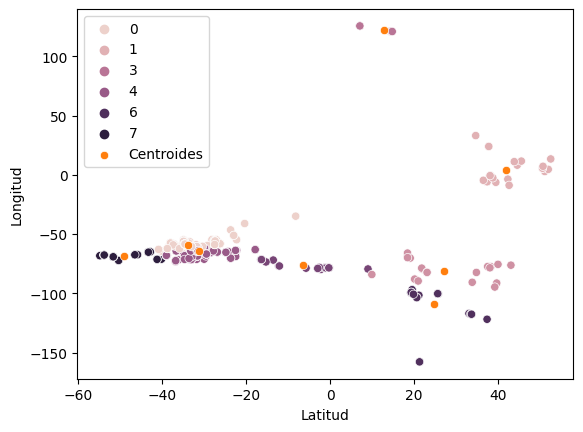

In [177]:
sns.scatterplot(data = rdo, x='Latitud', y = 'Longitud', hue = 'Labels')
sns.scatterplot(x = k.cluster_centers_[:, 0], y = k.cluster_centers_[:, 1], label = 'Centroides')
plt.legend(loc='upper left')
plt.show()

In [180]:
data['Labels'] = rdo.Labels

In [181]:
data

,M2,M2 Cubiertos,Ambientes,Baños,Ubicacion,Latitud,Longitud,Labels
0,280.0,130.0,6,1,docta,-31.460041,-64.306023,4.0
1,196.0,196.0,5,2,docta,-31.460041,-64.306023,4.0
2,130.0,130.0,3,1,docta,-31.460041,-64.306023,4.0
3,164.0,120.0,4,1,docta,-31.460041,-64.306023,4.0
4,132.0,132.0,5,3,docta,-31.460041,-64.306023,4.0
...,...,...,...,...,...,...,...,...
1931,425.0,387.0,8,4,josé manuel chaves 200,-31.397935,-64.230324,NaN
1932,111.0,111.0,6,2,rodríguez peña 1800,-34.589988,-58.388097,NaN
1933,60.0,60.0,4,2,bartolomé argensola 800,-31.381698,-64.193066,NaN
1934,60.0,60.0,3,1,santa rosa 1300,-34.526678,-58.478846,NaN
